In [355]:
#importing thr libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [356]:
#import the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
test = df_test.copy()

In [357]:
#print the shape of train and test dataset
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [358]:
#print the info of train and test dataset to see null value
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [359]:
#comparing the percentage of null value in train test dataset
train_null = df_train.isnull().mean() * 100
test_null = df_test.isnull().mean() * 100
null_value_df = pd.DataFrame([train_null,test_null])
null_value_df.T

,0,1
Id,0.000000,0.000000
MSSubClass,0.000000,0.000000
MSZoning,0.000000,0.274160
LotFrontage,17.739726,15.558602
LotArea,0.000000,0.000000
Street,0.000000,0.000000
Alley,93.767123,92.666210
LotShape,0.000000,0.000000
LandContour,0.000000,0.000000
Utilities,0.000000,0.137080


In [360]:
#merge the train and test dataset
mer = pd.merge(df_train,df_test,how='outer',on=None)

In [361]:
sale = mer['SalePrice']


In [362]:
#removing columns having more than 50% null value
mer = mer.loc[:,mer.isnull().mean()<.5]
#drop the salePricey-variable)
mer = mer.drop(['SalePrice'], axis =1)
mer.shape

(2919, 76)

In [363]:
#taking all the columns having null value
null_column = mer.loc[:,mer.isnull().mean() !=0].columns
null_column

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

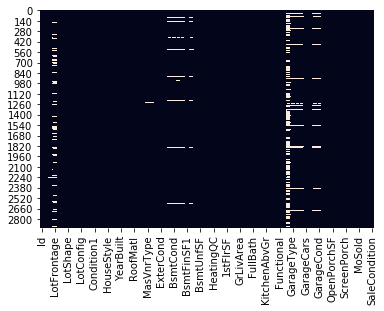

In [364]:
#visual representation of all the null value 
sns.heatmap(mer.isnull(), cbar = False)

In [365]:
#slpiting the columns into categorical and numerical columns
cat_col = mer.describe(include = object).columns
num_col = mer.describe(include = ['float64','int64']).columns

In [366]:
#fillinf null value
#for categorical value MODE
#for numerical value MEDIAN
for i in cat_col:
    mer[i] = mer[i].fillna(mer[i].mode()[0])
for j in num_col:
    mer[j] = mer[j].fillna(mer[j].median())

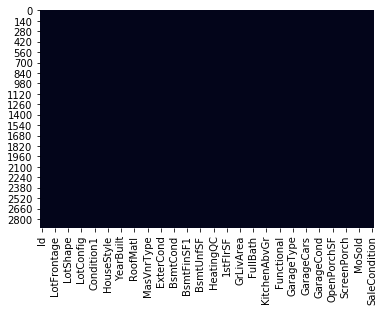

In [367]:
#visual representation of all the null value 
sns.heatmap(mer.isnull(), cbar = False)

In [368]:
#converting the categorical columns into numerical
from sklearn.preprocessing import LabelEncoder
for i in cat_col:
    le=LabelEncoder()
    le.fit(mer[i].astype(str))
    x=le.transform(mer[i].astype(str))
    mer[i]=x


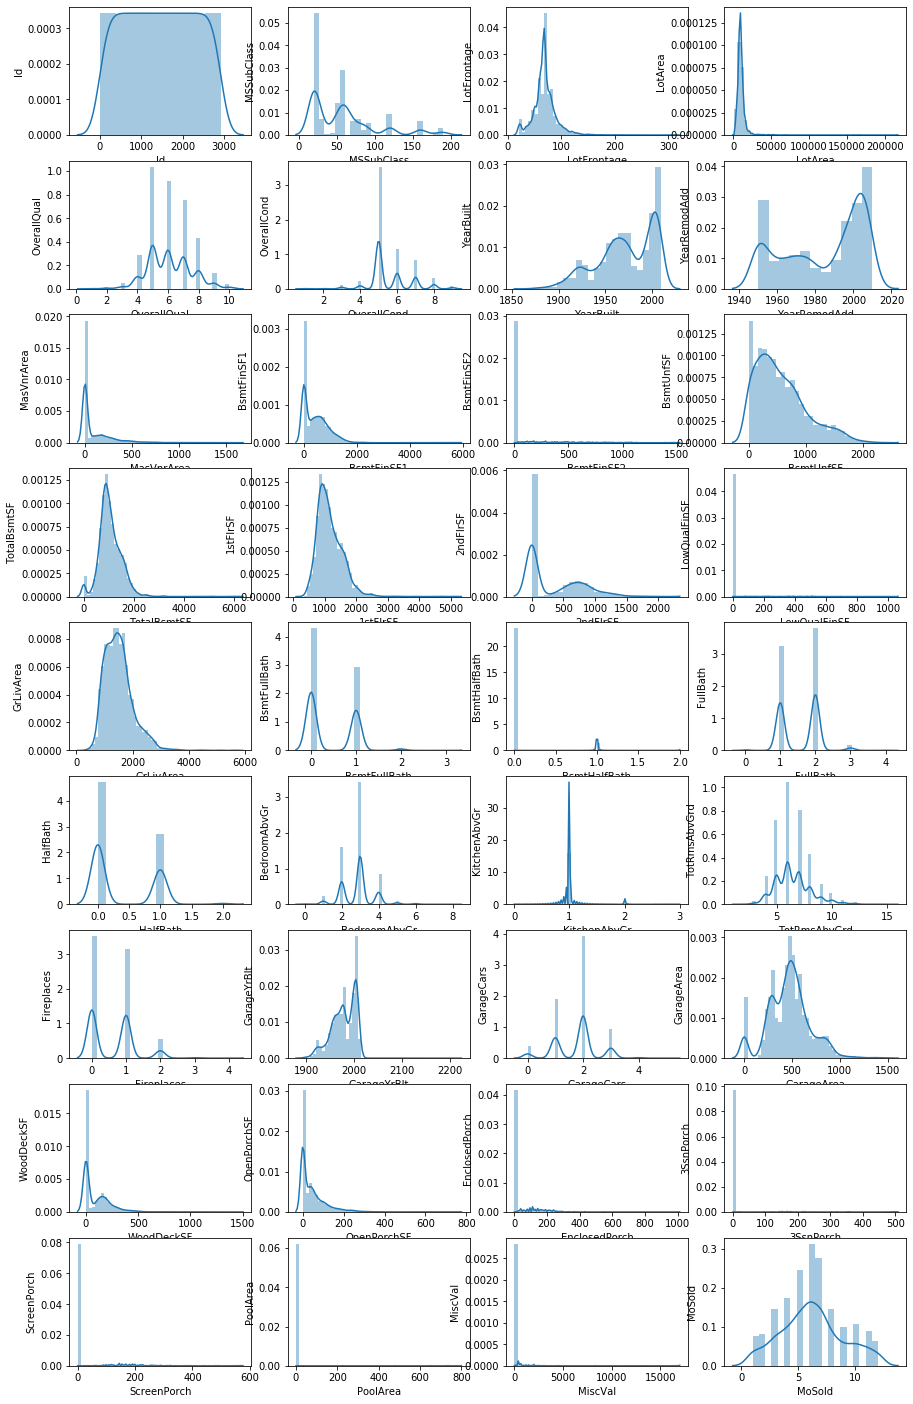

<Figure size 432x288 with 0 Axes>

In [369]:
fig, a = plt.subplots(9,4, figsize=(15,25))
k = 0
for i in range(9):
    for j in range(4):
        sns.distplot(mer[num_col[k]],ax = a[i,j] ).set(ylabel=num_col[k] )
        #plt.xticks(rotation=90)
        k+=1
plt.show()
plt.tight_layout()

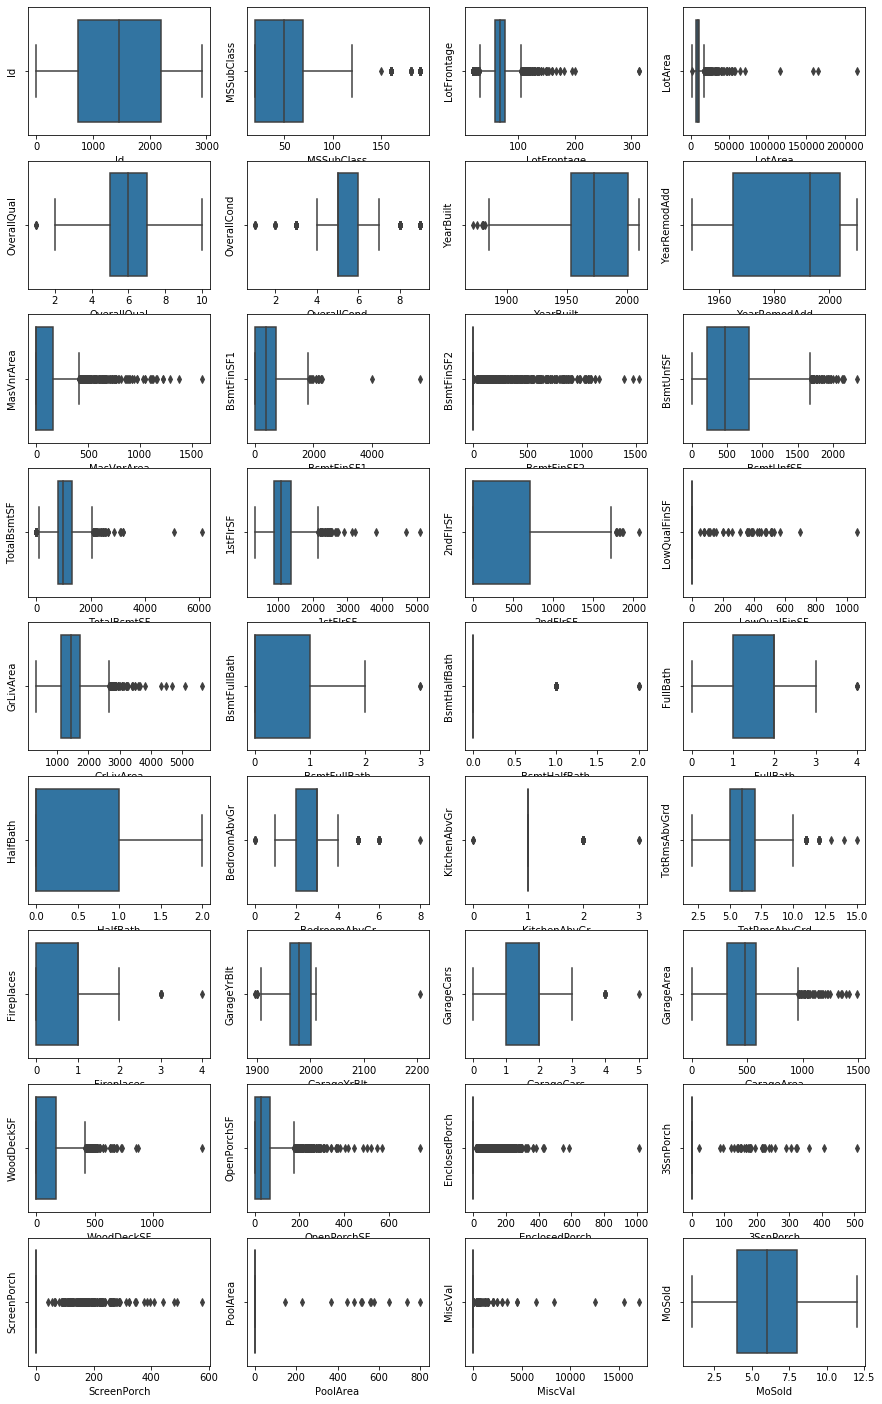

<Figure size 432x288 with 0 Axes>

In [370]:
#plot of numerical column before outliers treatment
fig, a = plt.subplots(9,4, figsize=(15,25))
k = 0
for i in range(9):
    for j in range(4):
        sns.boxplot(mer[num_col[k]],ax = a[i,j]  ).set(ylabel=num_col[k] )
        k+=1
plt.show()
plt.tight_layout()


In [371]:
#taking innerquartile range
Q1 = mer['OverallQual'].quantile(.25)
Q3 = mer['OverallQual'].quantile(.75)
IQ = Q3-Q1
min_val = Q1 - 1.5*IQ
max_val = Q3 + 1.5*IQ
mer.loc[mer['OverallQual'] < min_val] = min_val
mer.loc[(mer['OverallQual'] > max_val)] = max_val

In [372]:

q1 = ['LotFrontage', 'LotArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea' ,  'WoodDeckSF','OpenPorchSF']
mer = mer.drop(['3SsnPorch' ,'ScreenPorch', 'PoolArea' , 'MiscVal'], axis =1)

In [373]:
mer.loc[(mer['BsmtFinSF1'] >2500 ),'BsmtFinSF1'] = 2500
mer.loc[(mer['BsmtFinSF2'] >1250 ),'BsmtFinSF2'] = 1250
mer.loc[(mer['BsmtUnfSF'] >2000 ),'BsmtUnfSF'] = 2000
mer.loc[(mer['BsmtFullBath'] >1 ),'BsmtFullBath'] = 1
mer.loc[(mer['BsmtHalfBath'] >1),'BsmtHalfBath'] = 1
mer.loc[(mer['FullBath'] >2 ),'FullBath'] = 2
mer.loc[(mer['FullBath'] <1 ),'FullBath'] = 1
mer.loc[(mer['HalfBath'] >1 ),'HalfBath'] = 1
mer.loc[(mer['BedroomAbvGr'] >5 ),'BedroomAbvGr'] = 5
mer.loc[(mer['KitchenAbvGr'] >2),'KitchenAbvGr'] = 2
mer.loc[(mer['KitchenAbvGr'] <1),'KitchenAbvGr'] = 1
mer.loc[(mer['TotRmsAbvGrd'] >11),'TotRmsAbvGrd'] = 11
mer.loc[(mer['TotRmsAbvGrd'] <3 ),'TotRmsAbvGrd'] = 3
mer.loc[(mer['Fireplaces'] >2 ),'Fireplaces'] = 2
mer.loc[(mer['GarageCars'] >4 ),'GarageCars'] = 4
mer.loc[(mer['EnclosedPorch'] >150 ),'EnclosedPorch'] = 150



In [374]:
p = 0
nn = list(q1)
for i in range(len(nn)):
    Q1 = mer[nn[p]].quantile(.25)
    Q3 = mer[nn[p]].quantile(.75)
    IQ = Q3-Q1
    min_val = Q1 - 1.5*IQ
    max_val = Q3 + 1.5*IQ
    mer.loc[(mer[nn[p]] < min_val), nn[p]] = min_val
    mer.loc[(mer[nn[p]] > max_val), nn[p]] = max_val
    p+=1
   

KeyError: '3SsnPorch'

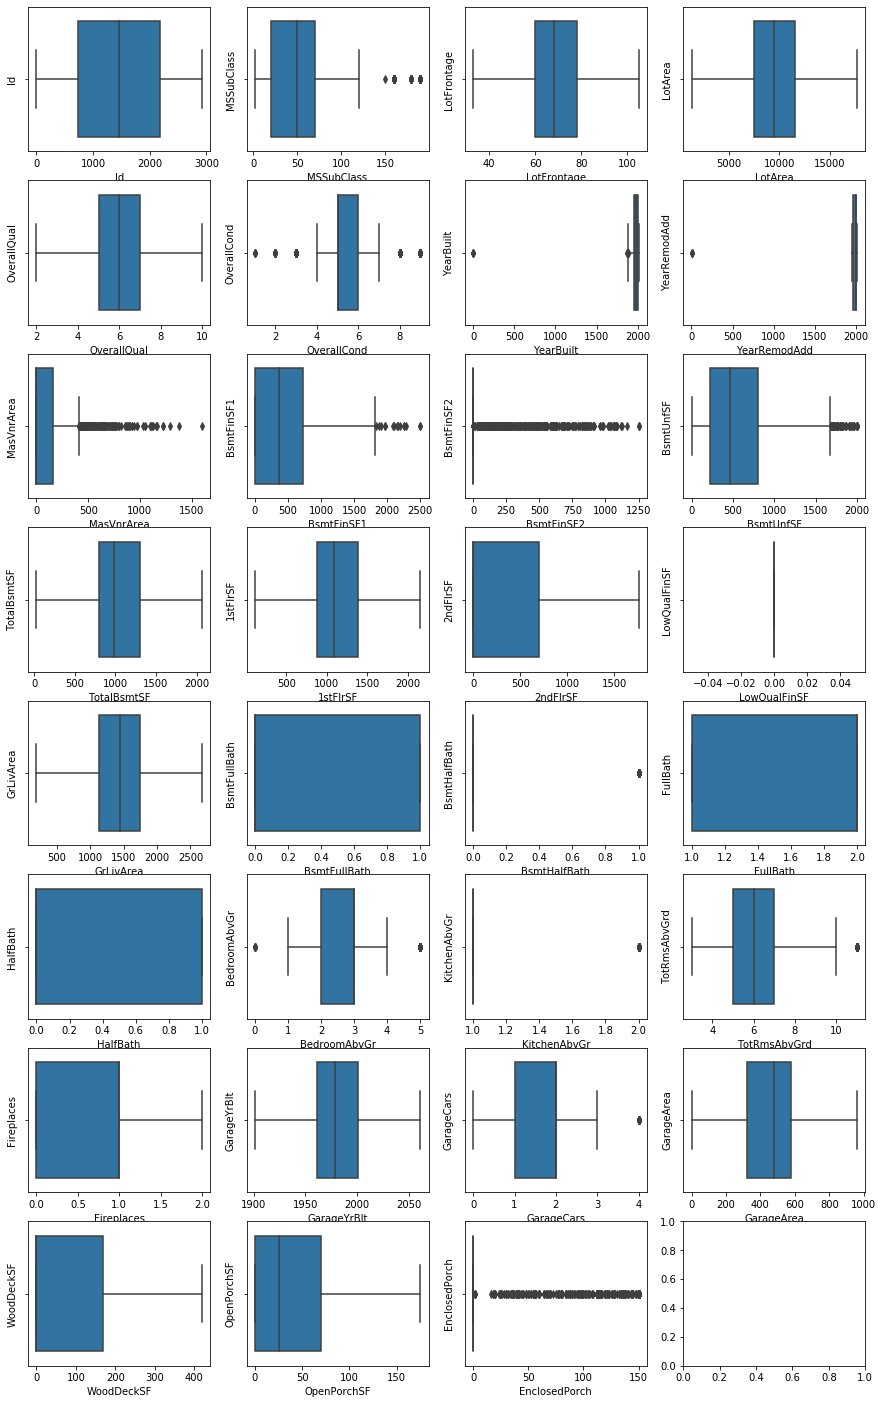

In [375]:
fig, a = plt.subplots(8,4, figsize=(15,25))
k = 0
for i in range(9):
    for j in range(4):
        sns.boxplot(mer[num_col[k]],ax = a[i,j] ).set(ylabel=num_col[k] )
        k+=1
plt.show()
plt.tight_layout()

In [376]:
new_col = mer.columns

In [377]:
#no_var_col = mer[new_col].var().sort_values(ascending = True)
#mer = mer.drop(no_var_col, axis = 1)
#no_var_col

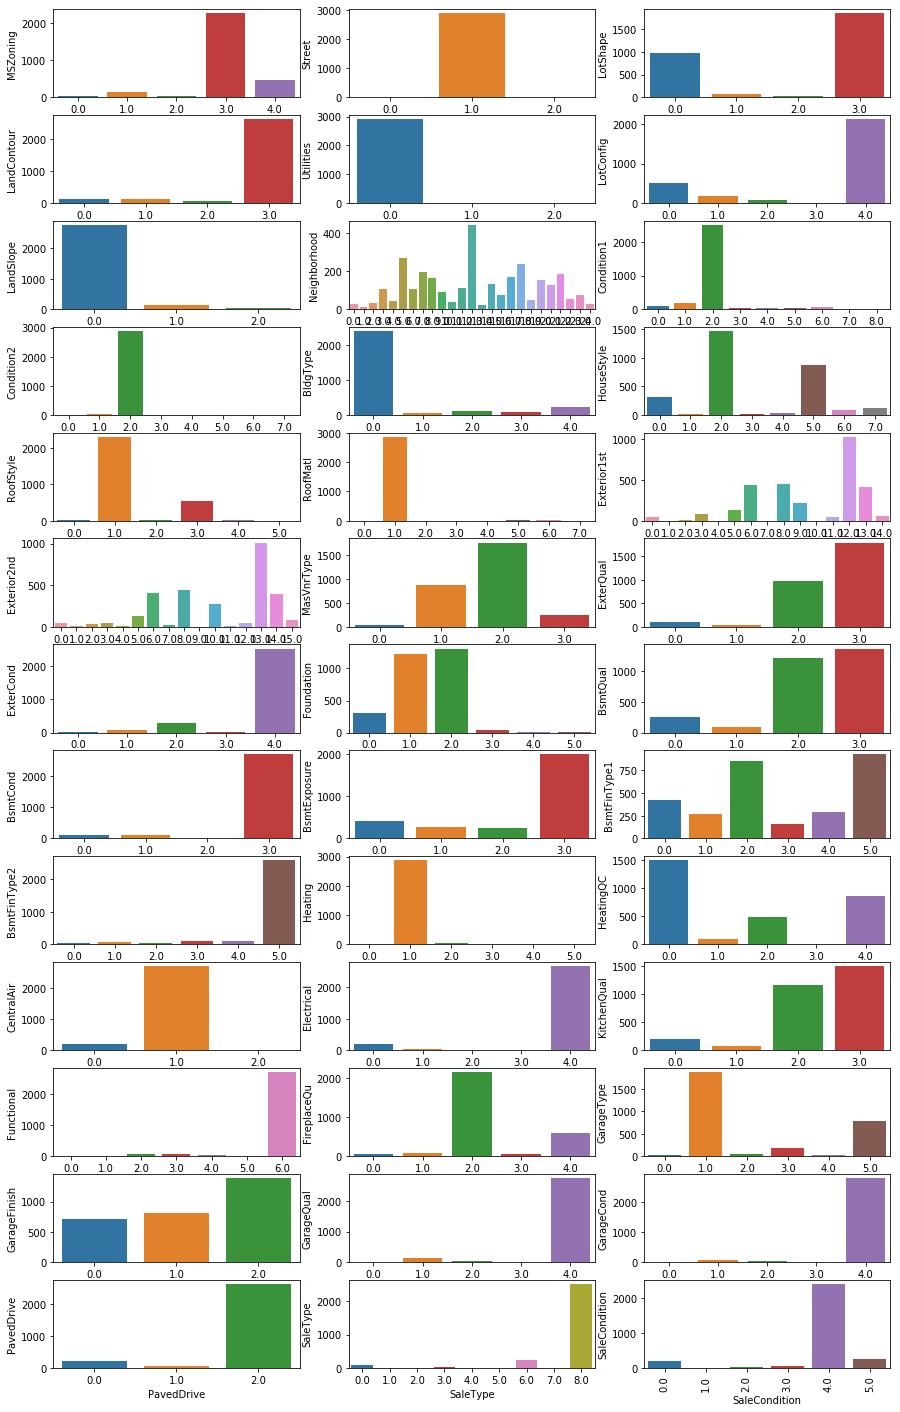

<Figure size 432x288 with 0 Axes>

In [378]:
fig, a = plt.subplots(13,3, figsize=(15,25))
k = 0
for i in range(13):
    for j in range(3):
        sns.countplot(mer[cat_col[k]],ax = a[i,j] ).set(ylabel=cat_col[k] )
        plt.xticks(rotation=90)
        k+=1
plt.show()
plt.tight_layout()

In [379]:
mer = mer.drop('Id', axis = 1)

In [380]:
new_col1 = mer.columns

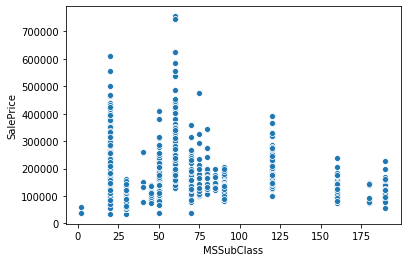

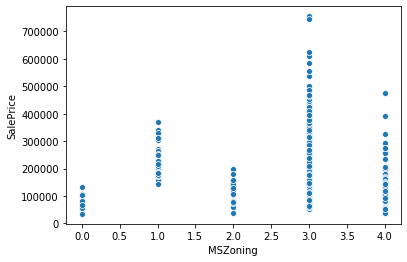

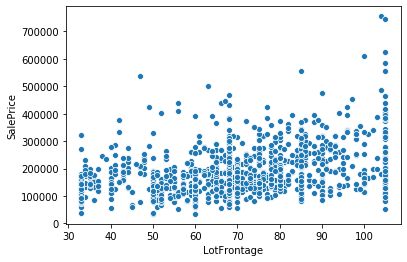

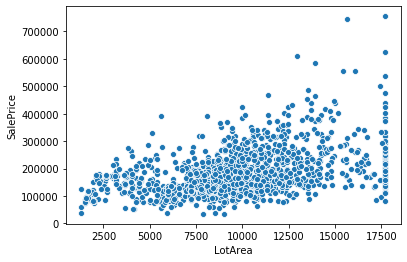

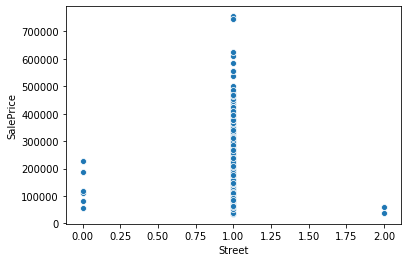

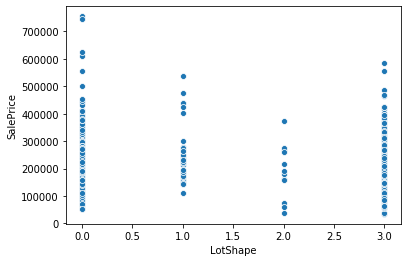

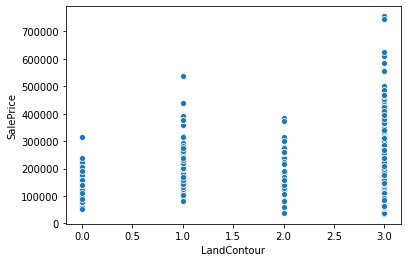

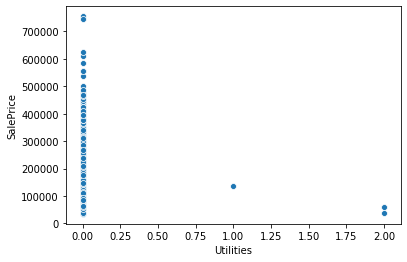

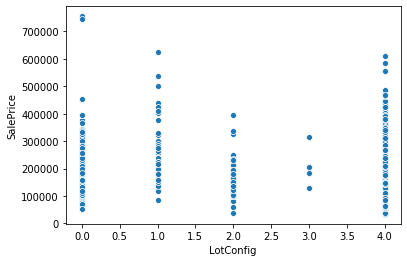

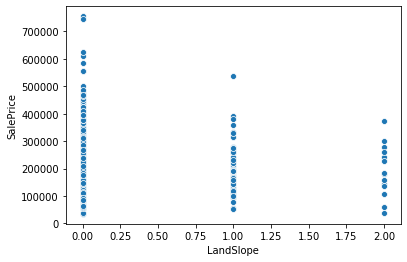

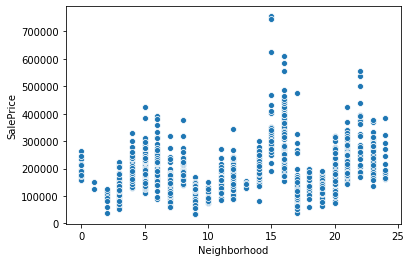

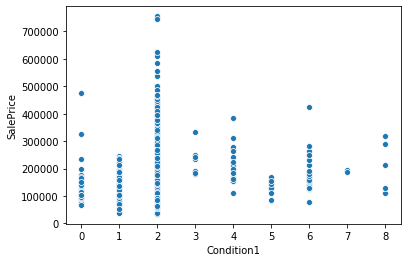

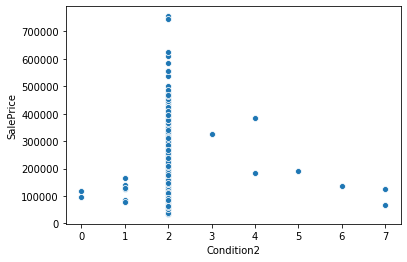

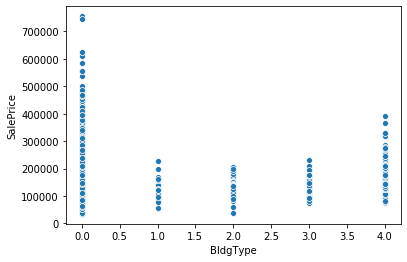

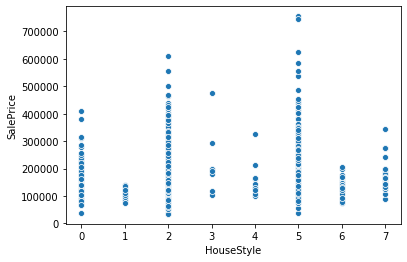

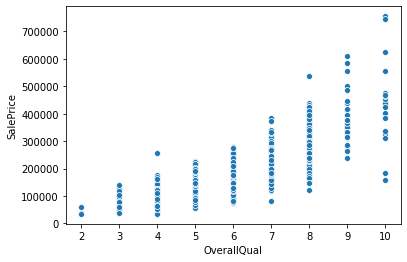

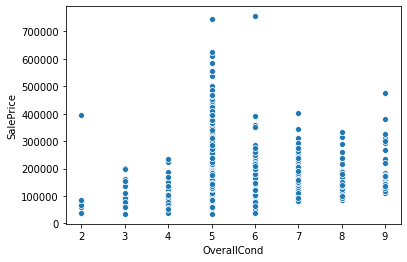

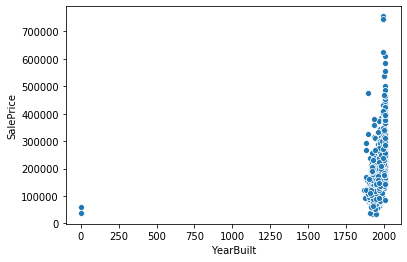

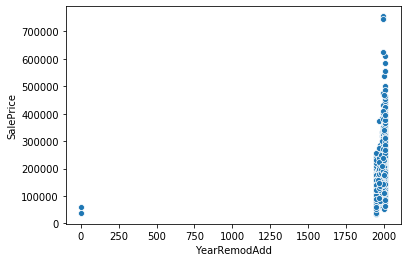

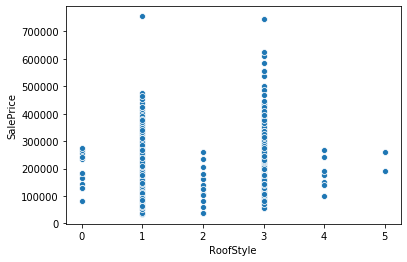

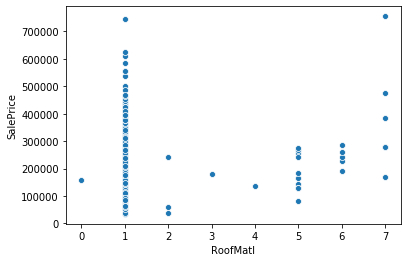

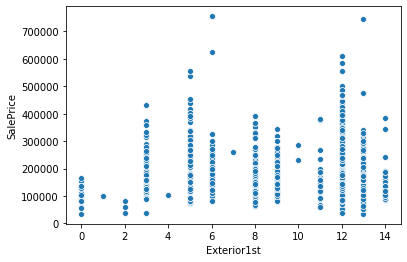

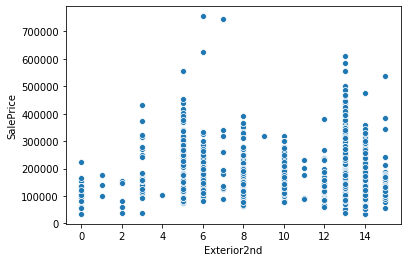

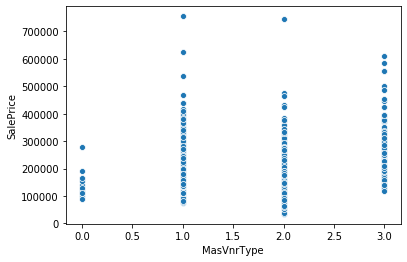

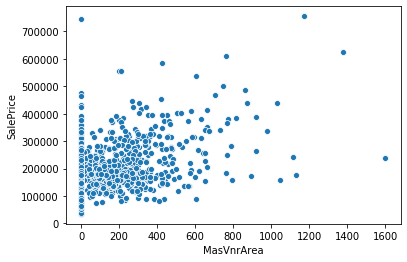

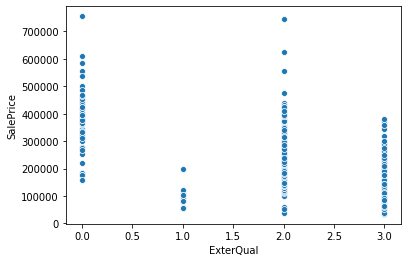

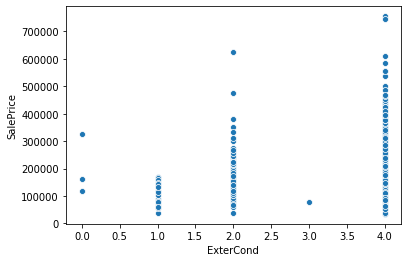

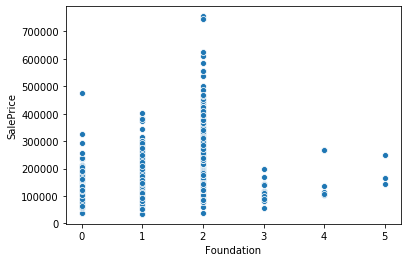

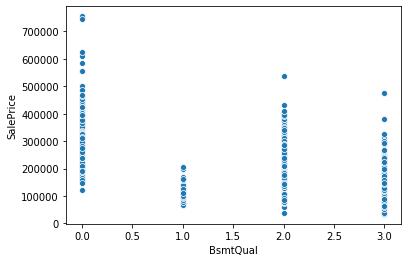

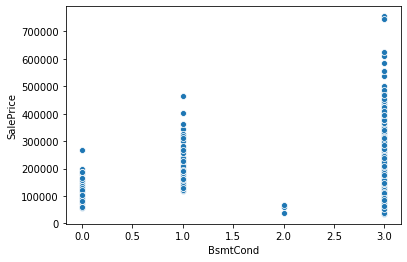

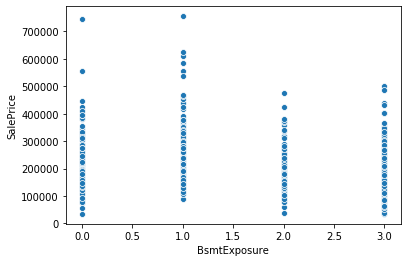

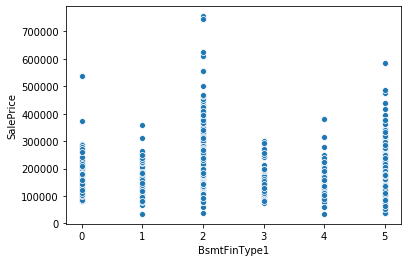

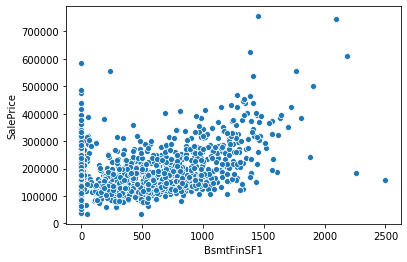

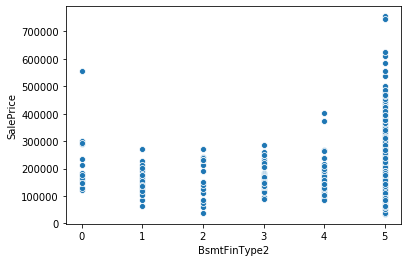

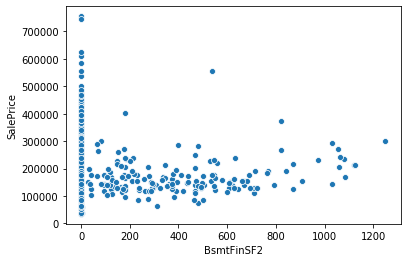

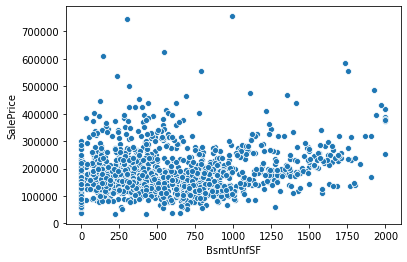

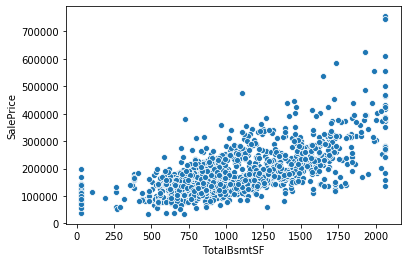

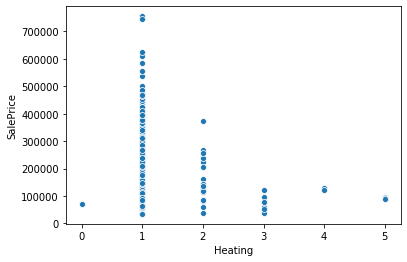

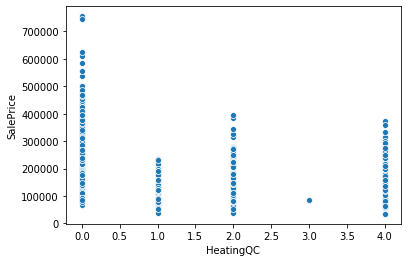

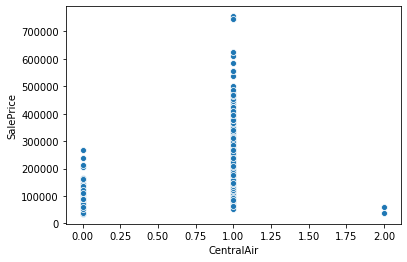

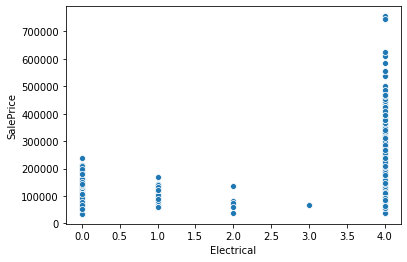

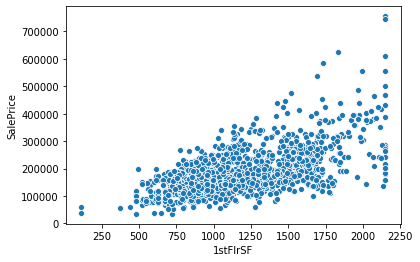

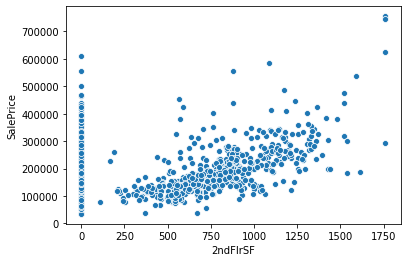

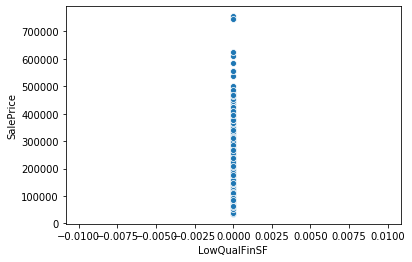

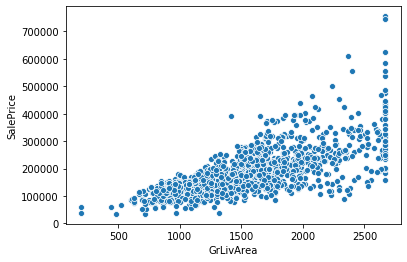

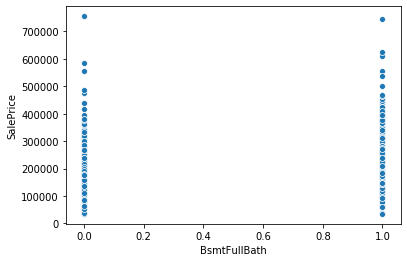

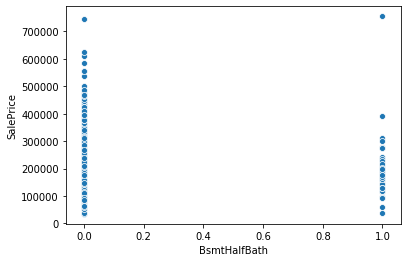

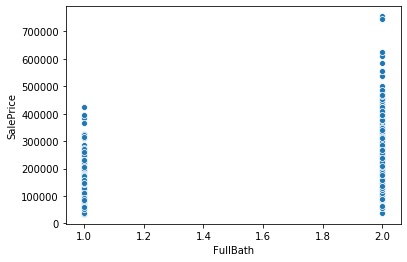

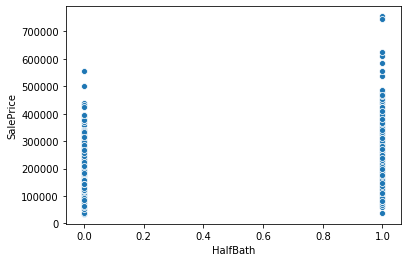

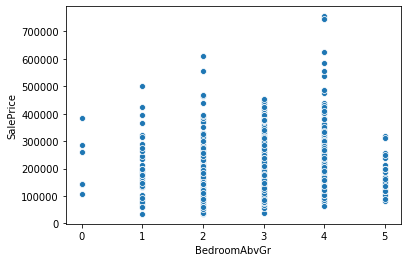

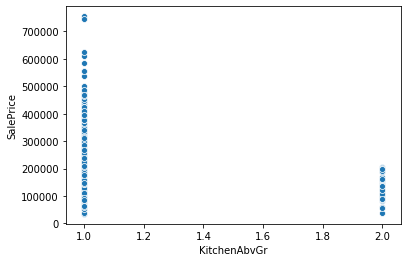

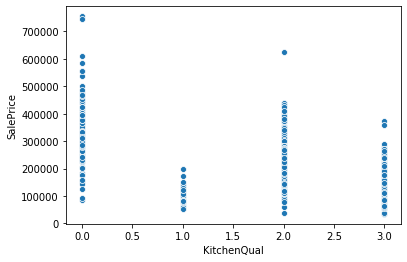

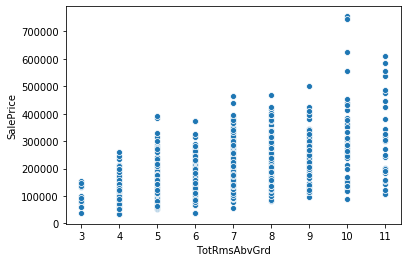

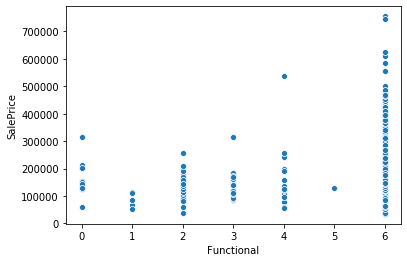

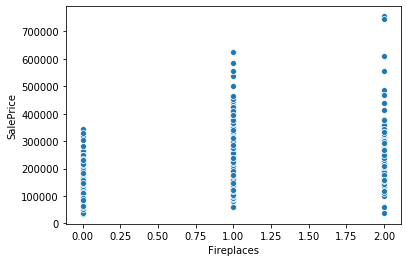

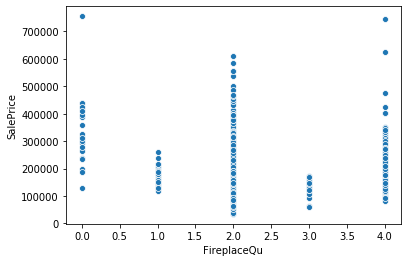

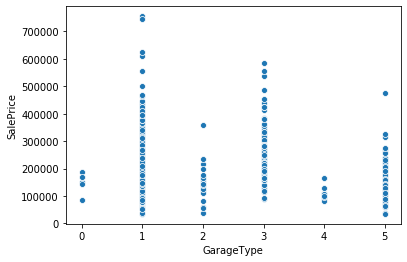

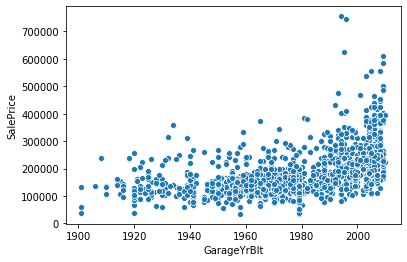

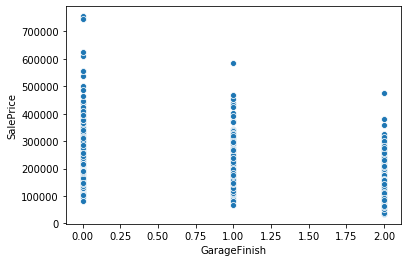

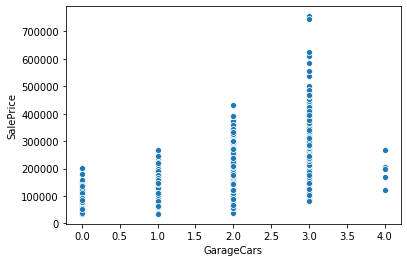

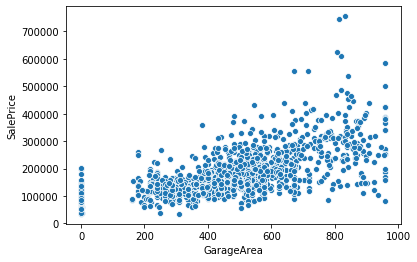

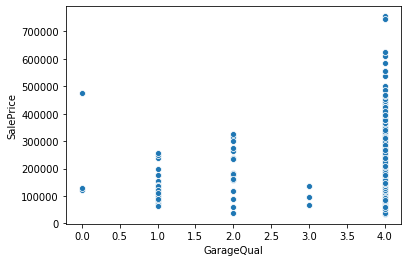

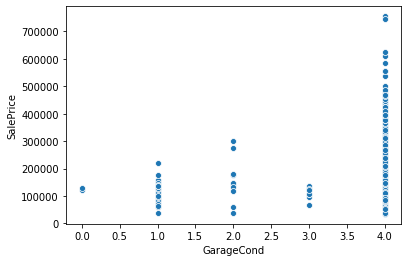

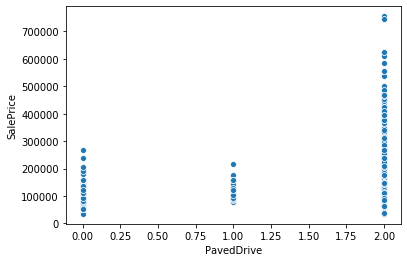

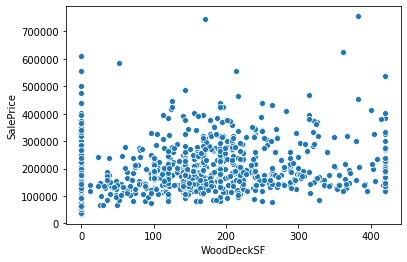

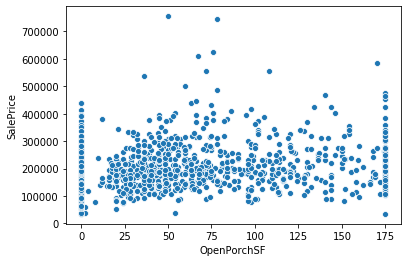

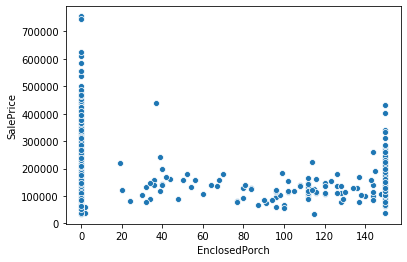

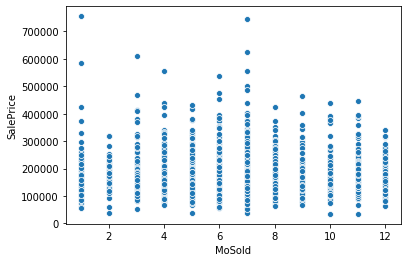

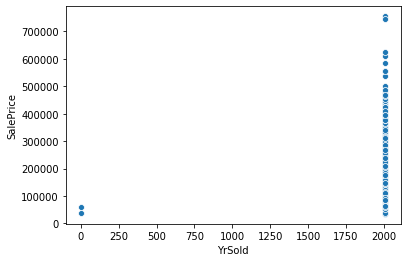

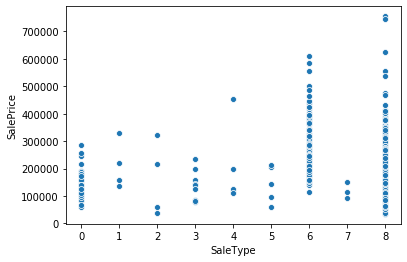

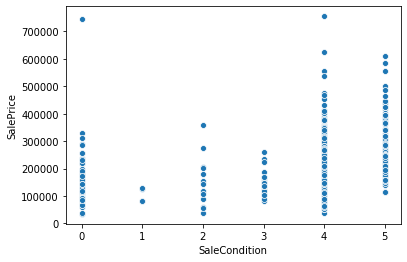

In [381]:
for i in new_col1:
    sns.scatterplot(x=mer[i], y=sale)
    plt.show()


In [382]:
new_col3 = ['LotFrontage', 'LotArea','LotShape', 'LandContour', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd','Functional',   'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',  'SaleType', 'SaleCondition']

In [383]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [384]:
variables = mer[new_col1]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

C:\Users\kiit\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,features
0,13.349275,MSSubClass
1,29.006950,MSZoning
2,35.505711,LotFrontage
3,19.750711,LotArea
4,262.798539,Street
5,3.772531,LotShape
6,21.100191,LandContour
7,12.161116,Utilities
8,5.162885,LotConfig
9,1.491066,LandSlope


In [385]:
new_col2 = list(vif.loc[vif['VIF']<10]['features'])

In [386]:
new_col2

['LotShape',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrArea',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold']

In [387]:
final_df = mer[new_col3]

In [388]:
final_df.head()

,LotFrontage,LotArea,LotShape,LandContour,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,...,TotRmsAbvGrd,Functional,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleType,SaleCondition
0,65.0,8450.0,3.0,3.0,5.0,7.0,5.0,2003.0,2003.0,1.0,...,8.0,6.0,2003.0,2.0,548.0,0.0,61.0,0.0,8.0,4.0
1,80.0,9600.0,3.0,3.0,24.0,6.0,8.0,1976.0,1976.0,1.0,...,6.0,6.0,1976.0,2.0,460.0,298.0,0.0,0.0,8.0,4.0
2,68.0,11250.0,0.0,3.0,5.0,7.0,5.0,2001.0,2002.0,1.0,...,6.0,6.0,2001.0,2.0,608.0,0.0,42.0,0.0,8.0,4.0
3,60.0,9550.0,0.0,3.0,6.0,7.0,5.0,1915.0,1970.0,1.0,...,7.0,6.0,1998.0,3.0,642.0,0.0,35.0,150.0,8.0,0.0
4,84.0,14260.0,0.0,3.0,15.0,8.0,5.0,2000.0,2000.0,1.0,...,9.0,6.0,2000.0,3.0,836.0,192.0,84.0,0.0,8.0,4.0


In [389]:
from sklearn.preprocessing import StandardScaler

In [390]:
ss = StandardScaler()
ss.fit(final_df)
x=ss.transform(final_df)
final_df = pd.DataFrame(x,columns = new_col3 )

In [391]:
new_train = final_df.ix[:1459]
new_test = final_df.ix[1460:]

In [392]:
y = sale.ix[:1459]

X = new_train

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [394]:
from sklearn.linear_model import LinearRegression

In [395]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
acutals = y_test
predicted =lr.predict(X_test) 

In [396]:
def model_validation(acutals,predicted):
    erorr=abs(acutals-predicted).sum()
    print("total error in the model",erorr)
    print("mean error in the model ",erorr/X_test.shape[0])
    from sklearn.metrics import mean_absolute_error
    print("mean absolute error",mean_absolute_error(acutals,predicted))
    from sklearn.metrics import mean_squared_error
    print("mean squared error",mean_squared_error(acutals,predicted))
    from sklearn.metrics import mean_squared_error
    print("root mean sqaure error" ,np.sqrt(mean_squared_error(acutals,predicted)))
    print("MAPE",(1/len(acutals))*(erorr/acutals.sum())*100)

In [397]:
model_validation(acutals,predicted)

total error in the model 9358448.78811882
mean error in the model  21366.321434061236
mean absolute error 21366.321434061236
mean squared error 1064424332.5506806
root mean sqaure error 32625.516586725193
MAPE 0.027099704578930413


In [398]:
from sklearn.metrics import r2_score

In [399]:
r2_score(acutals,predicted)

0.8474620191392497